# Sales Data Segmentation Using K-means Clustering

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Loading dataset, this dataset follows other encoding than utf-8 which is default encoding of pandas therefore I am specifying the encoding scheme here**

In [2]:
try:
    data = pd.read_csv('Sales_data.csv', encoding='latin1')
except UnicodeDecodeError:
    data = pd.read_csv('Sales_data.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Selecting the features to cluster on the basis of**

In [4]:
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']
data = data[features].dropna()

**Standardizing the data**

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

**Applying K-means Clustering**

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

**Visualizing the results**

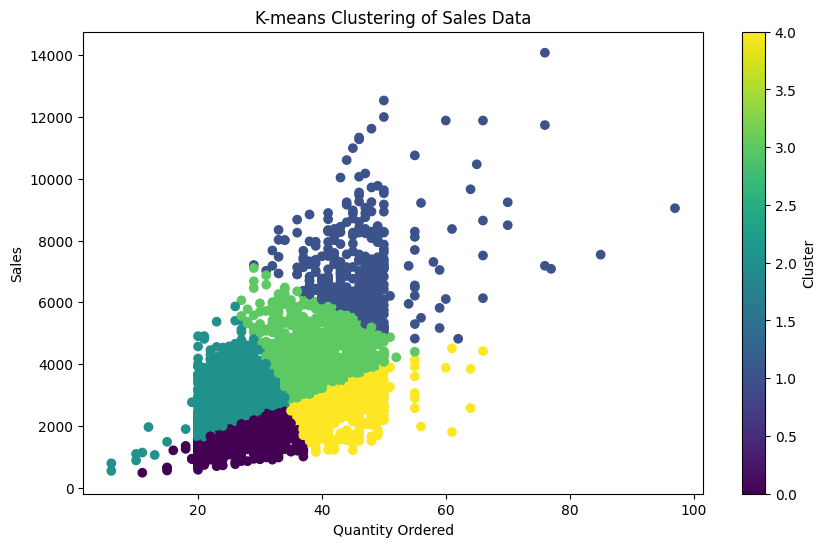

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['QUANTITYORDERED'], data['SALES'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Sales Data')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.colorbar(label='Cluster')
plt.show()